# Análisis exploratorio de los datos

Se realizó el análisis exploratorio de los datos para ver la calidad de los mismos, distribuciones, tendencias, agrupaciones. Para ello como paso 1, se definió cuáles eran las columnas de interés del dataset más grande con el que se contaba. Estos fueron: los salarios por oferta laboral, los salarios máximos, los salarios mínimos, el periodo de pago, y los empleadores. Esta información se ve a detalle 

<AxesSubplot: xlabel='header.payPeriod', ylabel='Count'>

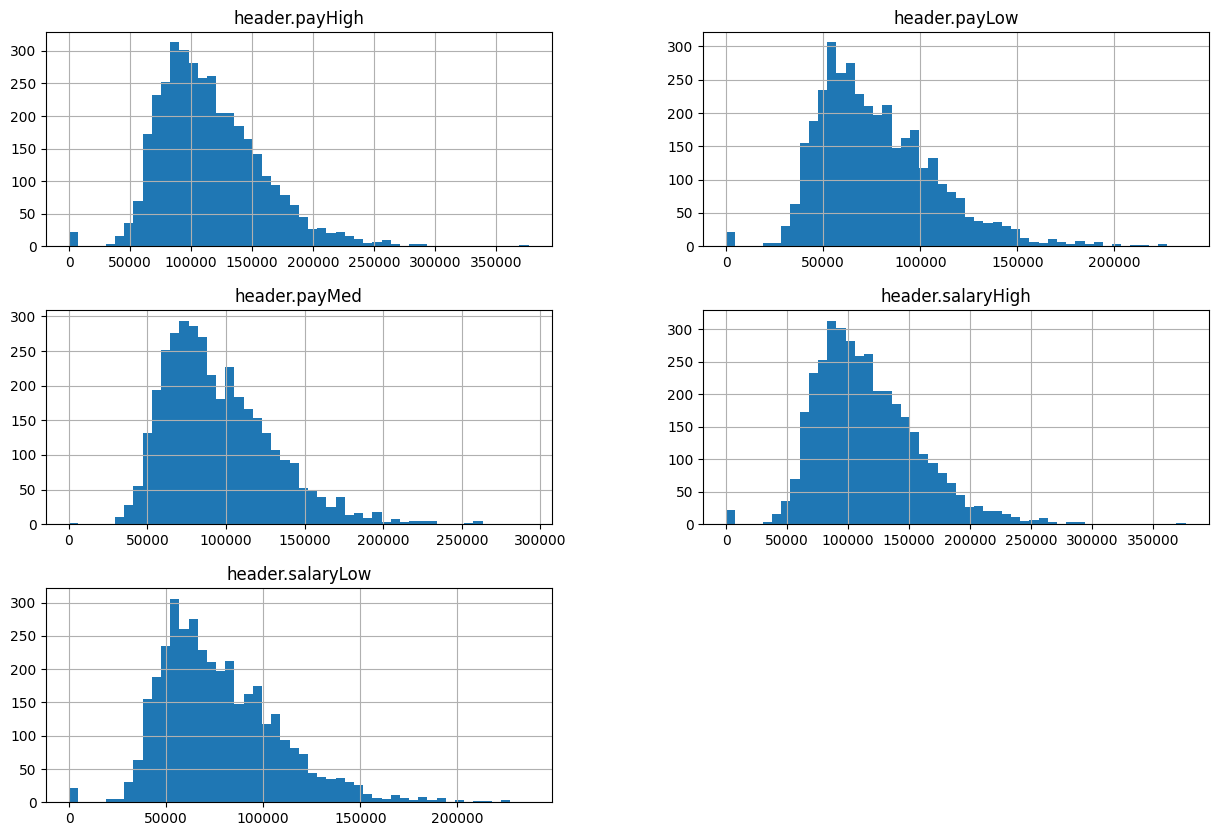

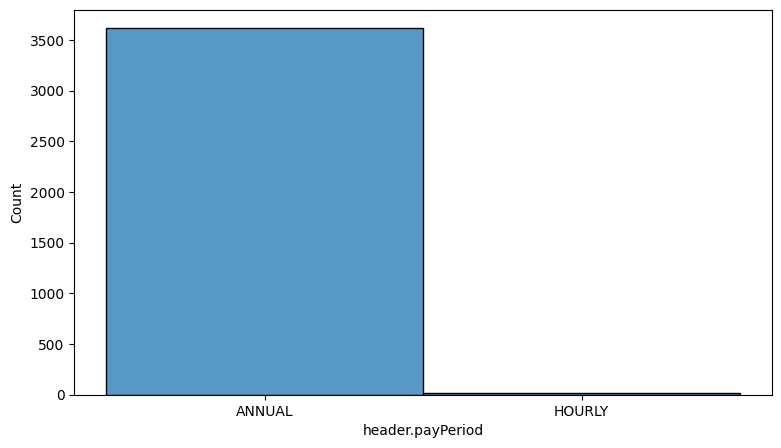

In [4]:
#HISTOGRAMA DE LA CALIDAD DE DATOS

import os
from google.cloud import storage
import pandas as pd
from collections import Counter
import ast
import numpy as np

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'ServiceKey_GoogleCloud.json'

#Importamos información de todos los datasets

#Importamos información de glassdoor
glassdor=pd.read_csv("Dataset\glassdoor.csv")

#Leemos los datos de reviews de glassdoor
review = pd.read_csv('Dataset\glassdoor_reviews.csv')

#Importamos información de ds de get on board
ds= pd.read_csv("Dataset\ds.csv")
ml= pd.read_csv("Dataset\ml.csv")

#Countries
countries= pd.read_csv("Dataset\cities_finales.csv", sep=";", encoding="latin-1")


glassdor[["header.payHigh","header.payLow","header.payMed","header.payPeriod","header.salaryHigh",
          "header.salaryLow","header.salarySource","map.employerName"]].hist(bins= 50, figsize=(15,10))

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5))
sns.histplot(glassdor["header.payPeriod"])

Se observa que en la parte de salarios existe una distribución de frecuencia alejada de la línea normal con valores un poco mayores a 0 USD. Viendo ademas la existencia de los tipos de periodo de pago: 1) anual, 2) horario, se llega a la conclusión que los outliers en la distribución de salarios están oriendas al periodo de pago

In [3]:
glassdor.describe()

,benefits.benefitRatingDecimal,benefits.comments,benefits.highlights,benefits.numRatings,breadCrumbs,gaTrackerData.category,gaTrackerData.empId,gaTrackerData.industryId,gaTrackerData.jobId.long,gaTrackerData.jobId.int,...,reviews,salary.country.continent.id,salary.country.currency.defaultFractionDigits,salary.country.currency.id,salary.country.id,salary.country.population,salary.currency.defaultFractionDigits,salary.currency.id,salary.salaries,wwfu
count,165290.000000,165289.000000,165289.000000,165290.000000,165290.000000,165290.000000,1.652900e+05,165290.000000,1.650440e+05,2.460000e+02,...,165290.000000,76777.0,76777.0,76777.0,76777.0,76777.0,76777.0,76777.000000,147149.000000,18741.000000
mean,1.387690,82645.000000,82645.000000,17.650342,82645.500000,2476.188614,6.945812e+05,142681.566731,3.329226e+09,1.754135e+09,...,82645.500000,4.0,2.0,2.0,2.0,60363602.0,2.0,2.037238,73575.000000,9371.000000
std,1.826381,47714.968659,47714.968659,49.901598,47715.257335,6098.395811,8.862075e+05,90479.876651,1.167657e+08,3.473246e+08,...,47715.257335,0.0,0.0,0.0,0.0,0.0,0.0,1.292106,42478.401718,5410.205033
min,0.000000,1.000000,1.000000,0.000000,1.000000,-1.000000,0.000000e+00,0.000000,2.208549e+09,3.276949e+08,...,1.000000,4.0,2.0,2.0,2.0,60363602.0,2.0,1.000000,1.000000,1.000000
25%,0.000000,41323.000000,41323.000000,0.000000,41323.250000,-1.000000,5.632000e+03,0.000000,3.303018e+09,1.756631e+09,...,41323.250000,4.0,2.0,2.0,2.0,60363602.0,2.0,2.000000,36788.000000,4686.000000
50%,0.000000,82645.000000,82645.000000,0.000000,82645.500000,-1.000000,3.043920e+05,200048.000000,3.370946e+09,1.904030e+09,...,82645.500000,4.0,2.0,2.0,2.0,60363602.0,2.0,2.000000,73575.000000,9371.000000
75%,3.504717,123967.000000,123967.000000,6.000000,123967.750000,-1.000000,1.107358e+06,200063.000000,3.399873e+09,1.957060e+09,...,123967.750000,4.0,2.0,2.0,2.0,60363602.0,2.0,2.000000,110362.000000,14056.000000
max,5.000000,165289.000000,165289.000000,596.000000,165290.000000,30165.000000,3.102014e+06,200147.000000,3.412782e+09,2.022056e+09,...,165290.000000,4.0,2.0,2.0,2.0,60363602.0,2.0,47.000000,147149.000000,18741.000000


En total existen cerca de 165'290 filas de datos. Sin embargo, para la parte de salarios sólo se cuentan con 76'7777

<AxesSubplot: xlabel='header.salarySource', ylabel='Count'>

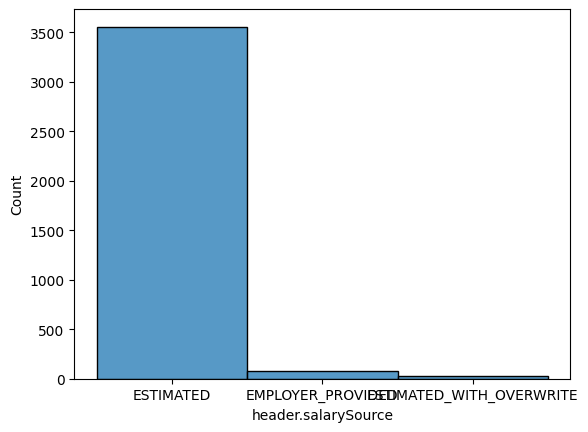

In [3]:
sns.histplot(glassdor["header.salarySource"])


Los salarios fueron estimados casi en un 90% y fueron compartidos por el empleador en una menor proporción

<AxesSubplot: xlabel='salary.country.currency.currencyCode', ylabel='Count'>

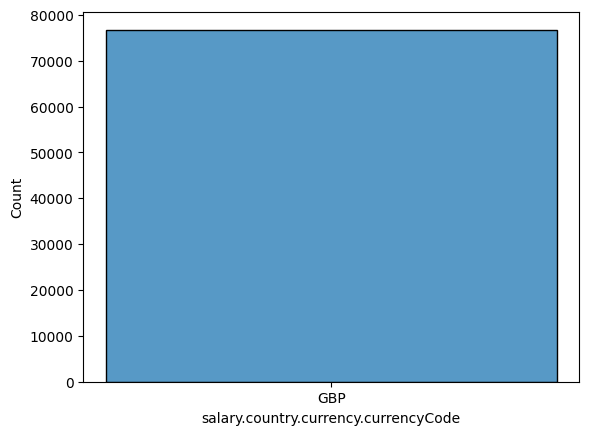

In [4]:
sns.histplot(glassdor["salary.country.currency.currencyCode"])


Se debe tener en cuenta que casi la mitad de los salarios compartidos se encuentran en otra unidad de medida diferente a USD, el cuál es el GBP.